# Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Read Data

In [2]:
df=pd.read_csv('KNN_Project_Data')
df.describe()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,1055.071157,991.851567,1529.373525,495.107156,940.590072,1550.637455,1561.003252,561.346117,1089.067338,1452.521629,0.50000
std,370.980193,392.278890,640.286092,142.789188,345.923136,493.491988,598.608517,247.357552,402.666953,568.132005,0.50025
min,21.170000,21.720000,31.800000,8.450000,17.930000,27.930000,31.960000,13.520000,23.210000,30.890000,0.00000
25%,767.413366,694.859326,1062.600806,401.788135,700.763295,1219.267077,1132.097865,381.704293,801.849802,1059.499689,0.00000
50%,1045.904805,978.355081,1522.507269,500.197421,939.348662,1564.996551,1565.882879,540.420379,1099.087954,1441.554053,0.50000
75%,1326.065178,1275.528770,1991.128626,600.525709,1182.578166,1891.937040,1981.739411,725.762027,1369.923665,1864.405512,1.00000
max,2117.000000,2172.000000,3180.000000,845.000000,1793.000000,2793.000000,3196.000000,1352.000000,2321.000000,3089.000000,1.00000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


## check for duplicate value

In [4]:
df.duplicated().sum()

0

## check for null value

In [5]:
df.isnull().sum()

XVPM            0
GWYH            0
TRAT            0
TLLZ            0
IGGA            0
HYKR            0
EDFS            0
GUUB            0
MGJM            0
JHZC            0
TARGET CLASS    0
dtype: int64

In [6]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

#### first point: scaler fit on train data because test data just use for evaluate model.

# train test split

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test= train_test_split(X, Y, test_size=.2, random_state=101)

# Standard Scaler and Normalizer

In [8]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

scaled_x_train=ss.fit_transform(x_train)

scaled_x_test= ss.transform(x_test)

In [9]:
from sklearn.preprocessing import Normalizer
norm=Normalizer()

normed_x_train=norm.fit_transform(x_train)

normed_x_test= ss.transform(x_test)

#### second point : Standard Scaler in this task act more better than normalizer so i use standard sclaer

# Train model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
knn = KNeighborsClassifier()
# default n_neighbors=5
knn.fit(scaled_x_train,y_train)

KNeighborsClassifier()

#### third point: knn have a hyperparameter name 'weights' that if be 'distance' make the model overfit!! 

# Prediction

In [12]:
pred = knn.predict(scaled_x_test)

In [13]:
print(f"the acuuracy of train set is : {knn.score(scaled_x_train,y_train)}\nthe accuracy of test set is : {knn.score(scaled_x_test,y_test)}")

the acuuracy of train set is : 0.85125
the accuracy of test set is : 0.845


In [14]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))

[[82 16]
 [15 87]]


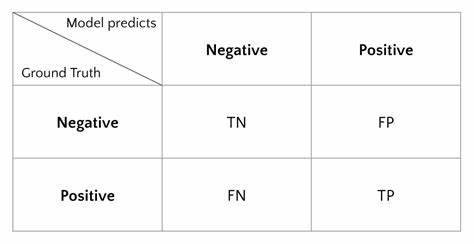

In [15]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84        98
           1       0.84      0.85      0.85       102

    accuracy                           0.84       200
   macro avg       0.85      0.84      0.84       200
weighted avg       0.85      0.84      0.84       200



# Choose K

In [16]:
error_rate=[]
for _ in range(1,201,10):
    model=KNeighborsClassifier(n_neighbors=_)
    model.fit(scaled_x_train,y_train)
    model_predict=model.predict(scaled_x_test)
    error_rate.append(np.mean(model_predict != y_test))

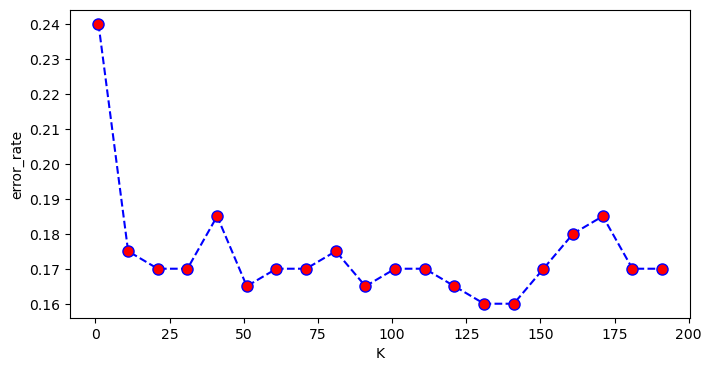

In [17]:
plt.figure(figsize=(8,4))
plt.plot(range(1,201,10), error_rate, color='blue', linestyle='dashed', marker='o',markerfacecolor='red',markersize=8)
plt.xlabel('K')
plt.ylabel('error_rate')
plt.show()

# make pipeline

In [18]:
from sklearn.pipeline import make_pipeline

pipe=make_pipeline(StandardScaler(),
                  KNeighborsClassifier(n_neighbors=130))
pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier',
                 KNeighborsClassifier(n_neighbors=130))])

In [19]:
pipe.score(x_test,y_test)

0.84

# make some change in label of test data 

In [20]:
fine_tuned_knn = KNeighborsClassifier(n_neighbors=130)
fine_tuned_knn.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=130)

In [21]:
# get the probability of prediction for each record 
prob_pred = fine_tuned_knn.predict_proba(scaled_x_test)
# get just probablity of label 1 for each record
label_1_prob=[value[1] for value in prob_pred]

In [22]:
data={
    'prob_1':label_1_prob,
    'y_test':y_test
}
fix_df=pd.DataFrame(data)
fix_df.head()

,prob_1,y_test
545,0.938462,1
298,0.615385,1
109,0.238462,0
837,0.792308,1
194,0.469231,0


In [23]:
# records with 0 label while must be 1.
fix_df[(fix_df['prob_1']>.7)&(fix_df['y_test']==0)]

,prob_1,y_test
225,0.707692,0
0,0.800000,0
218,0.815385,0
142,0.769231,0
825,0.792308,0


In [24]:
# records with 1 label while must be 0
fix_df[(fix_df['prob_1']<.3)&(fix_df['y_test']==1)]

,prob_1,y_test
98,0.207692,1
236,0.192308,1


In [25]:
# change 0 to 1 and vice verca
y_test.loc[fix_df[(fix_df['prob_1']>.7)&(fix_df['y_test']==0)].index]=1
y_test.loc[fix_df[(fix_df['prob_1']<.3)&(fix_df['y_test']==1)].index]=0

In [26]:
fix_pred=fine_tuned_knn.predict(scaled_x_test)

In [27]:
print(confusion_matrix(y_test,fix_pred))

[[80 15]
 [10 95]]


In [28]:
print(classification_report(y_test,fix_pred))

              precision    recall  f1-score   support

           0       0.89      0.84      0.86        95
           1       0.86      0.90      0.88       105

    accuracy                           0.88       200
   macro avg       0.88      0.87      0.87       200
weighted avg       0.88      0.88      0.87       200



In [29]:
print(f"the acuuracy of trainig set is : {fine_tuned_knn.score(scaled_x_train,y_train)}\nthe accuracy of test set is : {fine_tuned_knn.score(scaled_x_test,y_test)}")

the acuuracy of trainig set is : 0.8425
the accuracy of test set is : 0.875
